In [1]:
import pandas as pd
df=pd.read_csv('./grouped_data2.csv')
df


,credit_score,section of credit_score,country,age,age_group,gender,agegroup_gender,tenure,balance,balance_group,balance_per_tenure,products_number,credit_card,active_member,estimated_salary,churn
0,619,Poor,France,42,forties,Female,forties_Female,2,0.00,zero,0.000000,1,1,1,101348.88,1
1,608,Poor,Spain,41,forties,Female,forties_Female,1,83807.86,rest,83807.860000,1,0,1,112542.58,0
2,502,Very poor,France,42,forties,Female,forties_Female,8,159660.80,rest,19957.600000,3,1,0,113931.57,1
3,699,Fair,France,39,thirties,Female,thirties_Female,1,0.00,zero,0.000000,2,0,0,93826.63,0
4,850,Excellent,Spain,43,forties,Female,forties_Female,2,125510.82,rest,62755.410000,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Good,France,39,thirties,Male,thirties_Male,5,0.00,zero,0.000000,2,1,0,96270.64,0
9996,516,Very poor,France,35,thirties,Male,thirties_Male,10,57369.61,rest,5736.961000,1,1,1,101699.77,0
9997,709,Fair,France,36,thirties,Female,thirties_Female,7,0.00,zero,0.000000,1,0,1,42085.58,1
9998,772,Good,Germany,42,forties,Male,forties_Male,3,75075.31,rest,25025.103333,2,1,0,92888.52,1


In [2]:
print(df['balance_per_tenure'].median())
print(df['balance_per_tenure'].min())
print(df['balance_per_tenure'].max())
print(df['balance_per_tenure'].unique().size)

13992.102333333332
0.0
211774.31
6106


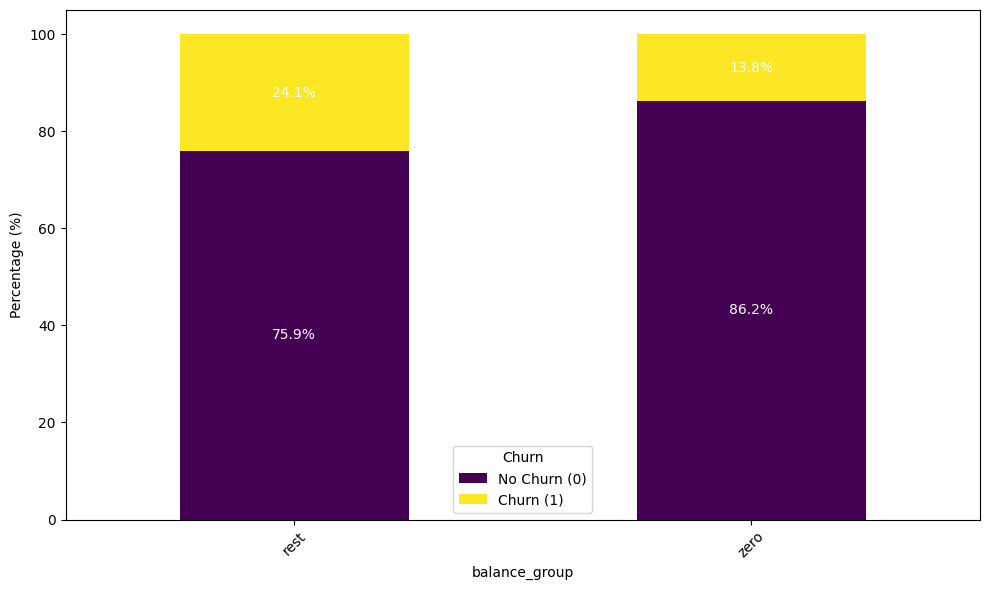

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그룹화하여 churn 값별 개수 계산
grouped_counts3 = df.groupby('balance_group')['churn'].value_counts().unstack(fill_value=0)

# 비율 계산
grouped_percentage3 = grouped_counts3.div(grouped_counts3.sum(axis=1), axis=0) * 100

# 비율 플롯 생성
plt.figure(figsize=(10, 6))

# Bar plot으로 비율 시각화
grouped_percentage3.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())

# 비율 표시
for i, (index, row) in enumerate(grouped_percentage3.iterrows()):
    for j, value in enumerate(row):
        plt.text(i, row.cumsum().iloc[j] - value / 2, f'{value:.1f}%', ha='center', va='center', color='white')

plt.xlabel('balance_group')
plt.ylabel('Percentage (%)')
# plt.title('Churn Rate by balance_group')
plt.legend(title='Churn', labels=['No Churn (0)', 'Churn (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:
# 0은 유의미한 값이 아닌 결측값이다
# 잔액 변수 중 0인 값을 중앙값이나 평균으로 대체
# 0은 결측값을 의미하므로 계산식에 포함하지 않는다

In [5]:
filtered_data = df[df['balance'] != 0.00]
# 중앙값이 덜 민감하단다. 중앙값으로 대체한다
print(filtered_data['balance'].mean())
print(filtered_data['balance'].median())
# 잘못된 계산
print(df['balance'].mean())
print(df['balance'].median())

119827.49379288736
119839.69
76485.889288
97198.54000000001


In [6]:
df['balance']=df['balance'].replace(0.00, filtered_data['balance'].median())



In [7]:
df

,credit_score,section of credit_score,country,age,age_group,gender,agegroup_gender,tenure,balance,balance_group,balance_per_tenure,products_number,credit_card,active_member,estimated_salary,churn
0,619,Poor,France,42,forties,Female,forties_Female,2,119839.69,zero,0.000000,1,1,1,101348.88,1
1,608,Poor,Spain,41,forties,Female,forties_Female,1,83807.86,rest,83807.860000,1,0,1,112542.58,0
2,502,Very poor,France,42,forties,Female,forties_Female,8,159660.80,rest,19957.600000,3,1,0,113931.57,1
3,699,Fair,France,39,thirties,Female,thirties_Female,1,119839.69,zero,0.000000,2,0,0,93826.63,0
4,850,Excellent,Spain,43,forties,Female,forties_Female,2,125510.82,rest,62755.410000,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Good,France,39,thirties,Male,thirties_Male,5,119839.69,zero,0.000000,2,1,0,96270.64,0
9996,516,Very poor,France,35,thirties,Male,thirties_Male,10,57369.61,rest,5736.961000,1,1,1,101699.77,0
9997,709,Fair,France,36,thirties,Female,thirties_Female,7,119839.69,zero,0.000000,1,0,1,42085.58,1
9998,772,Good,Germany,42,forties,Male,forties_Male,3,75075.31,rest,25025.103333,2,1,0,92888.52,1


In [8]:
df['balance'][df['churn'] ==1]
df['balance'][df['churn'] ==0]

1        83807.86
3       119839.69
4       125510.82
6       119839.69
8       142051.07
          ...    
9993    155060.41
9994    119839.69
9995    119839.69
9996     57369.61
9999    130142.79
Name: balance, Length: 7963, dtype: float64

In [9]:
import pandas as pd
import numpy as np

# 이탈 고객과 비이탈 고객의 계좌 잔액을 각각 가져오기
balance_churned = df['balance'][df['churn'] == 1]
balance_not_churned = df['balance'][df['churn'] == 0]

# 이탈 고객과 비이탈 고객의 총 계좌 잔액 개수
total_churned = len(balance_churned)
total_not_churned = len(balance_not_churned)

# 전체 계좌 잔액 개수
total_accounts = len(df)

# 각 그룹의 비율 계산
churned_percentage = (total_churned / total_accounts) * 100
not_churned_percentage = (total_not_churned / total_accounts) * 100

# 결과 출력
print(f"Percentage of accounts with churn = 1: {churned_percentage:.2f}%")
print(f"Percentage of accounts with churn = 0: {not_churned_percentage:.2f}%")


Percentage of accounts with churn = 1: 20.37%
Percentage of accounts with churn = 0: 79.63%


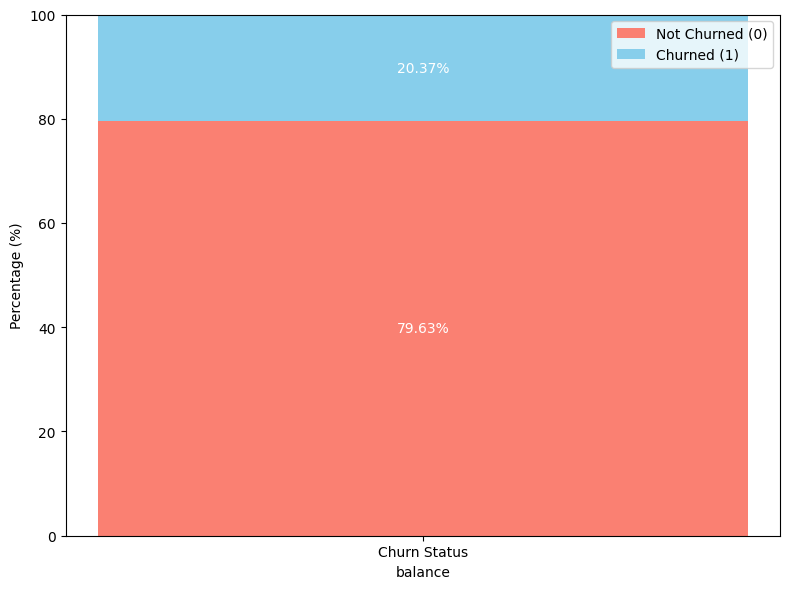

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 이탈 고객과 비이탈 고객의 총 계좌 잔액 개수
total_churned = len(df['balance'][df['churn'] == 1])
total_not_churned = len(df['balance'][df['churn'] == 0])

# 전체 계좌 잔액 개수
total_accounts = len(df)

# 각 그룹의 비율 계산
churned_percentage = (total_churned / total_accounts) * 100
not_churned_percentage = (total_not_churned / total_accounts) * 100

# 비율 데이터 생성
percentages = [churned_percentage, not_churned_percentage]

# 막대그래프로 비율 시각화 (스택드 형태)
plt.figure(figsize=(8, 6))

# Not Churned (0) 비율 (바닥에 위치)
plt.bar('Churn Status', not_churned_percentage, color='salmon', label='Not Churned (0)')
# Churned (1) 비율 (위에 쌓기)
plt.bar('Churn Status', churned_percentage, bottom=not_churned_percentage, color='skyblue', label='Churned (1)')

# 비율 값 표시 (순서 변경 및 중앙 위치 조정)
plt.text('Churn Status', not_churned_percentage / 2, f'{not_churned_percentage:.2f}%',
         ha='center', va='center', color='white')
plt.text('Churn Status', not_churned_percentage + churned_percentage / 2, f'{churned_percentage:.2f}%',
         ha='center', va='center', color='white')

plt.xlabel('balance')
plt.ylabel('Percentage (%)')
# plt.title('Stacked Bar Chart of Accounts by Churn Status')
plt.legend()
plt.ylim(0, 100)  # Y축 범위 설정

plt.tight_layout()
plt.show()

# 0을 중앙값으로 대체해도 이탈 비율은 크게 변하지 않는다
# 결측값이 맞았고 대체한 값은 중앙값이다

In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mutual_info_score

# 예제 데이터프레임 생성
# data = {
#     'age': [23, 45, 34, 25, 32, 45, 54, 40, 38, 28],
#     'salary': [50000, 60000, 70000, 50000, 60000, 75000, 80000, 90000, 95000, 60000],
#     'category': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A'],
#     'gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male']
# }
# df = pd.DataFrame(data)

categorical_columns = df.select_dtypes(include=['category'])

# 범주형 변수 인코딩
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# 엔트로피 계산 함수
def entropy(y):
    proportions = y.value_counts(normalize=True)
    return -np.sum(proportions * np.log2(proportions))

# 정보 이득 계산 함수
def information_gain(df, feature, target):
    total_entropy = entropy(df[target])
    feature_values = df[feature].unique()
    
    weighted_entropy = 0
    for value in feature_values:
        subset = df[df[feature] == value]
        weighted_entropy += (len(subset) / len(df)) * entropy(subset[target])
    
    return total_entropy - weighted_entropy

# 각 칼럼에 대한 정보 이득 계산
target = 'churn'
for feature in df.columns:
    if feature != target:
        ig = information_gain(df, feature, target)
        # print(f'Information Gain of {feature} with respect to {target}: {ig}')
        print(f"'{feature}':{ig}")

'credit_score':0.038547012884779575
'section of credit_score':0.0006065068745300106
'country':0.020222322423849803
'age':0.10721551580707478
'age_group':0.08887078499166601
'gender':0.008154397807196179
'agegroup_gender':0.09664136838137116
'tenure':0.0010139452215386369
'balance':0.5191397545967105
'balance_group':0.011307710863572629
'balance_per_tenure':0.4937072549203512
'products_number':0.10092156424028342
'credit_card':3.6636757529517894e-05
'active_member':0.01773286854203171
'estimated_salary':0.7292666572167683


In [32]:
# 딕셔너리 생성
example_dict = {
    'credit_score': 0.038547012884779575,
    'section of credit_score': 0.0006065068745300106,
    'country': 0.020222322423849803,
    'age': 0.10721551580707478,
    'age_group': 0.08887078499166601,
    'gender': 0.008154397807196179,
    'agegroup_gender': 0.09664136838137116,
    'tenure': 0.0010139452215386369,
    'balance': 0.5191397545967105,
    'balance_group': 0.011307710863572629,
    'balance_per_tenure': 0.4937072549203512,
    'products_number': 0.10092156424028342,
    'credit_card': 3.6636757529517894e-05,
    'active_member': 0.01773286854203171,
    'estimated_salary': 0.7292666572167683
}

# 벨류값에 따라 딕셔너리 정렬
sorted_items = sorted(example_dict.items(), key=lambda item: item[1],reverse=True)

# 정렬된 결과를 깔끔하게 출력
for key, value in sorted_items:
    print(f'{key:24} {value:.15f}')

    


estimated_salary         0.729266657216768
balance                  0.519139754596710
balance_per_tenure       0.493707254920351
age                      0.107215515807075
products_number          0.100921564240283
agegroup_gender          0.096641368381371
age_group                0.088870784991666
credit_score             0.038547012884780
country                  0.020222322423850
active_member            0.017732868542032
balance_group            0.011307710863573
gender                   0.008154397807196
tenure                   0.001013945221539
section of credit_score  0.000606506874530
credit_card              0.000036636757530


In [12]:
df.dtypes

credit_score                 int64
section of credit_score     object
country                     object
age                          int64
age_group                   object
gender                      object
agegroup_gender             object
tenure                       int64
balance                    float64
balance_group               object
balance_per_tenure         float64
products_number              int64
credit_card                  int64
active_member                int64
estimated_salary           float64
churn                        int64
dtype: object

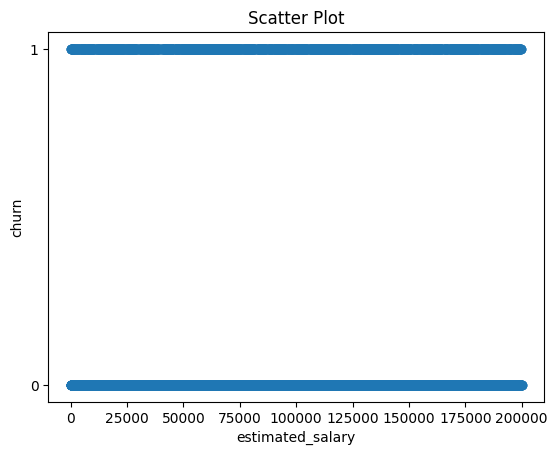

In [45]:
import matplotlib.pyplot as plt

plt.yticks([0, 1])

plt.scatter(df['estimated_salary'], df['churn'])
plt.xlabel('estimated_salary')
plt.ylabel('churn')
plt.title('Scatter Plot')
plt.show()


In [ ]:
# 특정 구간에서의 차별화:

# 비선형 관계가 직접적으로 시각적으로 나타나지 않더라도,
# 정보이득이 높은 변수는 특정 값의 범위에서 종속 변수를 효과적으로 분리할 수 있습니다.
# 예를 들어, 특정 잔액 구간이 고객의 이탈 여부를 구별하는 데 중요할 수 있습니다.

# 상호작용 효과:

# 변수 간의 상호작용이 정보이득을 높일 수 있습니다.
# 비선형 관계가 개별 변수에서 명확히 보이지 않더라도,
# 변수들 간의 상호작용이 종속 변수의 예측에 중요한 역할을 할 수 있습니다.

# 간단한 수식으로 상호작용을 확인해본다
# 두 변수를 곱하여 파생 변수를 만든다

In [46]:
df['age_balance'] = df['age'] * df['balance']

In [48]:
df.insert(df.columns.get_loc('balance_group') + 1,
              'age_balance',
              df.pop('age_balance'))
df

,credit_score,section of credit_score,country,age,age_group,gender,agegroup_gender,tenure,balance,balance_group,age_balance,balance_per_tenure,products_number,credit_card,active_member,estimated_salary,churn
0,619,Poor,France,42,forties,Female,forties_Female,2,119839.69,zero,5033266.98,0.000000,1,1,1,101348.88,1
1,608,Poor,Spain,41,forties,Female,forties_Female,1,83807.86,rest,3436122.26,83807.860000,1,0,1,112542.58,0
2,502,Very poor,France,42,forties,Female,forties_Female,8,159660.80,rest,6705753.60,19957.600000,3,1,0,113931.57,1
3,699,Fair,France,39,thirties,Female,thirties_Female,1,119839.69,zero,4673747.91,0.000000,2,0,0,93826.63,0
4,850,Excellent,Spain,43,forties,Female,forties_Female,2,125510.82,rest,5396965.26,62755.410000,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Good,France,39,thirties,Male,thirties_Male,5,119839.69,zero,4673747.91,0.000000,2,1,0,96270.64,0
9996,516,Very poor,France,35,thirties,Male,thirties_Male,10,57369.61,rest,2007936.35,5736.961000,1,1,1,101699.77,0
9997,709,Fair,France,36,thirties,Female,thirties_Female,7,119839.69,zero,4314228.84,0.000000,1,0,1,42085.58,1
9998,772,Good,Germany,42,forties,Male,forties_Male,3,75075.31,rest,3153163.02,25025.103333,2,1,0,92888.52,1


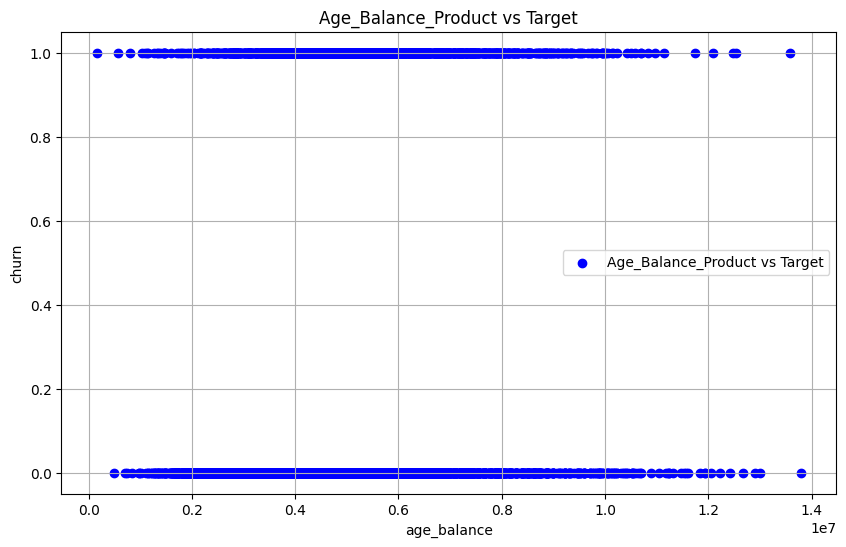

In [49]:
# 파생 변수와 종속 변수 간의 관계 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df['age_balance'], df['churn'], color='blue', label='Age_Balance_Product vs Target')
plt.xlabel('age_balance')
plt.ylabel('churn')
plt.title('Age_Balance_Product vs Target')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
import pandas as pd
import numpy as np

def calculate_entropy(y):
    """주어진 레이블 배열의 엔트로피를 계산합니다."""
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities + 1e-9))  # 1e-9는 로그의 0 문제 방지

def information_gain(df, feature, target):
    """특정 변수에 대한 정보 이득을 계산합니다."""
    # 전체 데이터의 엔트로피 계산
    total_entropy = calculate_entropy(df[target])
    
    # 변수 값에 따른 엔트로피 계산
    feature_values = df[feature].unique()
    weighted_entropy = 0
    
    for value in feature_values:
        subset = df[df[feature] == value]
        weight = len(subset) / len(df)
        weighted_entropy += weight * calculate_entropy(subset[target])
    
    # 정보 이득 = 전체 엔트로피 - 가중 평균된 엔트로피
    ig = total_entropy - weighted_entropy
    return ig


# Feature1과 Feature2의 정보 이득 계산
ig_feature1 = information_gain(df, 'age_balance', 'churn')

print(f"Feature1의 정보 이득: {ig_feature1}")




Feature1의 정보 이득: 0.5537961041985692
